In [2]:
# notebook to load the raw govt (CPCB/DPCC/IMD) data in the Excel sheet format and save them as csvs with latitude 
# and longitude fields

%matplotlib inline

#from openpyxl import Workbook
#from openpyxl import load_workbook
#import json
#from datetime import datetime
#from datetime import timedelta

import os, sys
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

sys.path.insert(0, '..')

In [3]:
import preprocess
importlib.reload(preprocess)
from preprocess import read_xlsx

In [4]:
# load all the Excel sheets from the source folder on Dropbox

#suffix = '1H_May2018_Feb2020'
#suffix = '1H_Feb2020_May2020'
#sheets = sorted(glob('data/govdata/*.xlsx'), key=lambda name: int(name.split('/data')[1].replace('.xlsx','')))
#sheets = sorted(glob('/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB/Raw/*.xlsx'))
#fileslist = glob('/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB/Raw/*_{}.xlsx'.format(suffix))
#fileslist = glob('../data/govdata/raw/CPCB_Raw_{0}/*_{0}.xlsx'.format(suffix))

start_dt_str = '2018-05-01'
end_dt_str = '2020-11-01'
fileslist = glob('../data/govdata/raw/CPCB_Raw_*/*.xlsx')
fileslist.sort()
for fpath in fileslist:
    print(os.path.basename(fpath))

AshokVihar_DPCC_AnandVihar_DPCC_1H_Feb2020_May2020.xlsx
BurariCrossing_IMD_AyaNagar_IMD_1H_Feb2020_May2020.xlsx
DTU_CPCB_CRRIMathuraRoad_IMD_1H_Feb2020_May2020.xlsx
DwarkaSector8_DPCC_DKSSR_DPCC_1H_Feb2020_May2020.xlsx
IHBAS_CPCB_IGIAirport_IMD_1H_Feb2020_May2020.xlsx
Jahangirpuri_DPCC_ITO_CPCB_1H_Feb2020_May2020.xlsx
LodhiRoad_IMD_JNS_DPCC_1H_Feb2020_May2020.xlsx
MandirMarg_DPCC_MDCNS_DPCC_1H_Feb2020_May2020.xlsx
NSIT_CPCB_Mundaka_DPCC_1H_Feb2020_May2020.xlsx
OkhlaPhase2_DPCC_NehruNagar_DPCC_1H_Feb2020_May2020.xlsx
PunjabiBagh_DPCC_Patparganj_DPCC_1H_Feb2020_May2020.xlsx
Pusa_IMD_Pusa_DPCC_1H_Feb2020_May2020.xlsx
Rohini_DPCC_RKPuram_DPCC_1H_Feb2020_May2020.xlsx
Sirifort_CPCB_Shadipur_CPCB_1H_Feb2020_May2020.xlsx
SriAurobindoMarg_DPCC_SoniaVihar_DPCC_1H_Feb2020_May2020.xlsx
VivekVihar_DPCC_Wazirpur_DPCC_1H_Feb2020_May2020.xlsx
AnandVihar_DPCC_1H_May2018_Feb2020.xlsx
AshokVihar_DPCC_1H_May2018_Feb2020.xlsx
AyaNagar_IMD_1H_May2018_Feb2020.xlsx
BurariCrossing_IMD_1H_May2018_Feb2020.xlsx
C

In [5]:
data_list = read_xlsx(fileslist[0])

Number of monitors: 2
Reading data for AshokVihar_DPCC
Reading data for AnandVihar_DPCC


In [6]:
print(len(data_list))

for name, data in data_list:
    print(name, data.shape)
    print(data.iloc[0,:])
    print(data.iloc[-1,:])

2
AshokVihar_DPCC (2160, 6)
AT        8.57
RH       86.22
WD       38.92
WS        0.35
pm10    196.50
pm25    122.00
Name: 2020-02-01 00:00:00+05:30, dtype: float64
AT       27.28
RH       54.77
WD       31.73
WS        1.17
pm10    120.00
pm25     80.50
Name: 2020-04-30 23:00:00+05:30, dtype: float64
AnandVihar_DPCC (2160, 6)
AT       14.68
RH       85.40
WD      229.75
WS        0.30
pm10    254.75
pm25    101.50
Name: 2020-02-01 00:00:00+05:30, dtype: float64
AT     NaN
RH     NaN
WD     NaN
WS     NaN
pm10   NaN
pm25   NaN
Name: 2020-04-30 23:00:00+05:30, dtype: float64


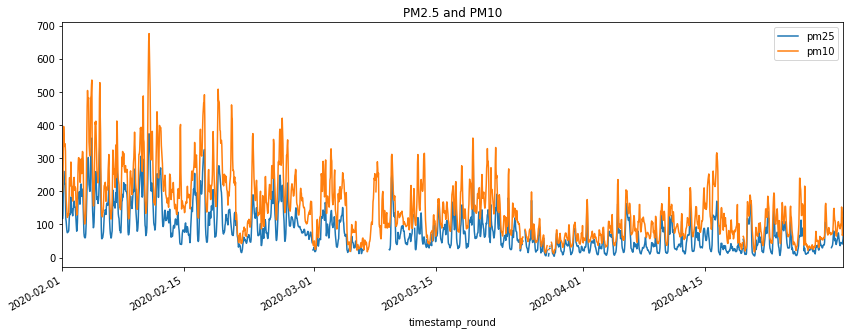

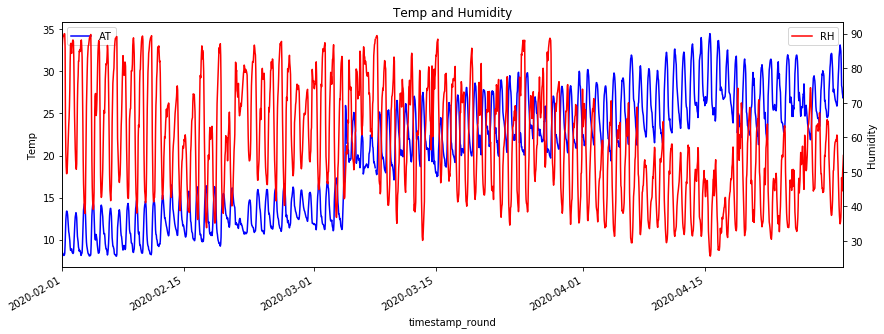

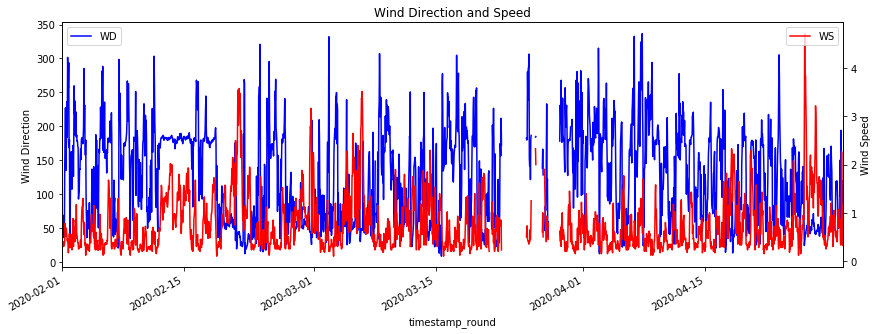

In [7]:
# sample plot of the data as an example illustration
name, df = data_list[0]

plt.figure(figsize=(14, 5))
plt.title('PM2.5 and PM10')
df.pm25.plot(ax=plt.gca())
df.pm10.plot(ax=plt.gca())
plt.legend()

plt.figure(figsize=(14, 5))
plt.title('Temp and Humidity')
df.AT.plot(ax=plt.gca(), c='b')
plt.ylabel('Temp')
plt.legend(loc=2)
plt.twinx()
df.RH.plot(ax=plt.gca(), c='r')
plt.ylabel('Humidity')
plt.legend(loc=1)

plt.figure(figsize=(14, 5))
plt.title('Wind Direction and Speed')
df.WD.plot(ax=plt.gca(), c='b')
plt.ylabel('Wind Direction')
plt.legend(loc=2)
plt.twinx()
df.WS.plot(ax=plt.gca(), c='r')
plt.ylabel('Wind Speed')
plt.legend(loc=1)

plt.show()
plt.close('all')

In [9]:
# import json

# # reading in the metadata to get the latitudes and longitudes
# locsdict = dict()

# with open('data/gov_metadata.json')as fl:
#     stations = json.load(fl)

# for station in stations['map']['station_list']:
#     nm = station['station_name']
#     locsdict[nm] = (float(station['latitude']), float(station['longitude']))

In [10]:
# print(len(locsdict))
# locsdict

In [11]:
# # correct errors (see notes.txt in the same folder as this notebook)
# # (1) remove DU north campus
# # (2) swap RK Puram and Punjabi Bagh locations
# locsdict.__delitem__('North Campus, DU, New Delhi - IMD')
# locsdict['Punjabi Bagh, Delhi - DPCC'] = (28.674045, 77.131023)
# locsdict['R K Puram, New Delhi - DPCC'] = (28.563262, 77.186937)

In [8]:
# saving individual dataframes as individual csvs, and also saving a combined BIG csv
dfs_list = []

for fii, fpath in enumerate(fileslist):
    print('{}/{} {}'.format(fii + 1, len(fileslist), os.path.basename(fpath)))
    
    data_list = read_xlsx(fpath)
    
    for name, df in data_list:
        df['monitor_id'] = name
        df.reset_index(inplace=True)
        df.set_index(['monitor_id', 'timestamp_round'], inplace=True)
        dfs_list.append(df)
    
#     for monitorid, df in data_list:
#         df = df.loc[slice(start_dt, end_dt),:]
#         df = df.iloc[:-1] # for some reason the first row for Feb 1, 2020 is getting included, hence removing that
#         df.to_csv(os.path.join(subsavedir, monitorid + '.csv'))
        
#         df['monitor_id'] = monitorid
#         df.reset_index(inplace=True)
#         df.set_index(['monitor_id', 'timestamp_round'], inplace=True)
#         dfs_list.append(df)

1/53 AshokVihar_DPCC_AnandVihar_DPCC_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for AshokVihar_DPCC
Reading data for AnandVihar_DPCC
2/53 BurariCrossing_IMD_AyaNagar_IMD_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for BurariCrossing_IMD
Reading data for AyaNagar_IMD
3/53 DTU_CPCB_CRRIMathuraRoad_IMD_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for DTU_CPCB
Reading data for CRRIMathuraRoad_IMD
4/53 DwarkaSector8_DPCC_DKSSR_DPCC_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for DwarkaSector8_DPCC
Reading data for DKSSR_DPCC
5/53 IHBAS_CPCB_IGIAirport_IMD_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for IHBAS_CPCB
Reading data for IGIAirport_IMD
6/53 Jahangirpuri_DPCC_ITO_CPCB_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for Jahangirpuri_DPCC
Reading data for ITO_CPCB
7/53 LodhiRoad_IMD_JNS_DPCC_1H_Feb2020_May2020.xlsx
Number of monitors: 2
Reading data for LodhiRoad_IMD
Reading data for JNS_DPCC
8/53 Ma

In [9]:
df = pd.concat(dfs_list, axis=0)

# sort index and remove duplicates
df.sort_index(inplace=True)
df = df.loc[~df.index.duplicated(),:]

# select data only between specified start and end dates
start_dt = pd.Timestamp(start_dt_str, tz='Asia/Kolkata')
end_dt = pd.Timestamp(end_dt_str, tz='Asia/Kolkata') 
end_slice_dt = end_dt - pd.Timedelta(hours=1) # not including this last timestamp in the data while slicing
df = df.loc[(slice(None), slice(start_dt, end_slice_dt)), :]

# remove NorthCampusDU_IMD
df.drop('NorthCampusDU_IMD', level=0, inplace=True)

print('Number of locations:', df.index.get_level_values(0).unique().size)
print('Total number of entries:', df.shape[0])
print('Number of entries per location:', df.shape[0] / df.index.get_level_values(0).unique().size)

df

Number of locations: 32
Total number of entries: 702720
Number of entries per location: 21960.0


AT     RH      WD    WS   pm10  \
monitor_id      timestamp_round                                                
AnandVihar_DPCC 2018-05-01 00:00:00+05:30  30.32  49.85   98.17  3.67  295.0   
                2018-05-01 01:00:00+05:30  29.44  51.58   88.67  4.11  202.0   
                2018-05-01 02:00:00+05:30  28.19  56.00   89.58  4.31  163.0   
                2018-05-01 03:00:00+05:30  26.89  62.42   89.75  5.03  140.0   
                2018-05-01 04:00:00+05:30  26.27  64.75   84.50  6.12  151.0   
...                                          ...    ...     ...   ...    ...   
Wazirpur_DPCC   2020-10-31 19:00:00+05:30  23.85  29.40  314.95  1.30  377.0   
                2020-10-31 20:00:00+05:30  22.90  29.40  313.67  1.18  430.5   
                2020-10-31 21:00:00+05:30  22.10  29.40  318.20  1.23  468.5   
                2020-10-31 22:00:00+05:30  21.95  29.40  329.62  1.20  509.0   
                2020-10-31 23:00:00+05:30  21.10  29.40  314.73  1.35  580.5   

                                            pm25  
monitor_id      timestamp_round                   
AnandVihar_DPCC 2018-05-01 00:00:00+05:30   68.0  
                2018-05-01 01:00:00+05:30   53.0  
                2018-05-01 02:00:00+05:30   53.0  
                2018-05-01 03:00:00+05:30   46.0  
                2018-05-01 04:00:00+05:30   48.0  
...                                          ...  
Wazirpur_DPCC   2020-10-31 19:00:00+05:30   87.0  
                2020-10-31 20:00:00+05:30  111.0  
                2020-10-31 21:00:00+05:30  149.0  
                2020-10-31 22:00:00+05:30  196.0  
                2020-10-31 23:00:00+05:30  246.0  

[702720 rows x 6 columns]

In [10]:
# save it 
newsuffix = '1H_{}_{}'.format(start_dt.strftime('%Y%m%d'), end_dt.strftime('%Y%m%d'))

savedir = '../data/govdata/'
subsavedir = os.path.join(savedir, 'govdata_' + newsuffix)
if not os.path.exists(subsavedir):
    os.makedirs(subsavedir)

df.to_csv(os.path.join(savedir, 'govdata_{}.csv'.format(newsuffix)))

grouped = df.groupby(level=0)
for name, group in grouped:
    group.droplevel(0).to_csv(os.path.join(subsavedir, name + '.csv'))

In [16]:
savedir

'/home/shivar/Dropbox/Delhi Pollution/07_Data_Secondary/CPCB_Oct2018/Raw'

In [20]:
locs_list

[('AnandVihar_DPCC', 28.646835, 77.316032, 'Anand Vihar, Delhi - DPCC'),
 ('AshokVihar_DPCC', 28.695381, 77.181665, 'Ashok Vihar, Delhi - DPCC'),
 ('AyaNagar_IMD', 28.4706914, 77.1099364, 'Aya Nagar, New Delhi - IMD'),
 ('BurariCrossing_IMD',
  28.7256504,
  77.2011573,
  'Burari Crossing, New Delhi - IMD'),
 ('CRRIMathuraRoad_IMD',
  28.5512005,
  77.2735737,
  'CRRI Mathura Road, New Delhi - IMD'),
 ('DKSSR_DPCC',
  28.498571,
  77.26484,
  'Dr. Karni Singh Shooting Range, Delhi - DPCC'),
 ('DTU_CPCB', 28.7500499, 77.1112615, 'DTU, New Delhi - CPCB'),
 ('DwarkaSector8_DPCC',
  28.5710274,
  77.0719006,
  'Dwarka-Sector 8, Delhi - DPCC '),
 ('EastArjunNagar_CPCB',
  28.6556017,
  77.2859318,
  'East Arjun Nagar, Delhi - CPCB'),
 ('IGIAirport_IMD',
  28.5627763,
  77.1180053,
  'IGI Airport (T3), New Delhi - IMD'),
 ('IHBAS_CPCB',
  28.6811736,
  77.3025234,
  'IHBAS, Dilshad Garden,New Delhi - CPCB'),
 ('ITO_CPCB', 28.6316945, 77.2494387, 'ITO, New Delhi - CPCB'),
 ('JNS_DPCC', 28.580

In [18]:
# colnames = ['Monitor ID', 'Latitude', 'Longitude', 'Location']
# collen_0 = max([len(colnames[0])] + [len(tup[0]) for tup in locs_list]) + 1
# collen_1 = max([len(colnames[1])] + [len(str(tup[1])) for tup in locs_list]) + 1
# collen_2 = max([len(colnames[2])] + [len(str(tup[2])) for tup in locs_list]) + 1

# fout = open(os.path.join(savedir, 'govdata_locations.csv'), 'w')
# fout.write('{{:{}}},{{:>{}}},{{:>{}}}, {{}}\n'.format(collen_0, collen_1, collen_2).format(*colnames))

# for locid, lat, lon, locname in locs_list:
#     fout.write('{{:{}}},{{:>{}}},{{:>{}}}, {{}}\n'.format(collen_0, collen_1, collen_2).format(locid, str(lat), str(lon), '"' + locname + '"'))
# fout.close()

In [28]:
# create dataframe and export to csv (above does not work)
locs_df = pd.DataFrame.from_records(locs_list, columns=['Monitor ID', 'Latitude', 'Longitude', 'Location'])
locs_df.set_index('Monitor ID', inplace=True)
locs_df

,Latitude,Longitude,Location
Monitor ID,,,
AnandVihar_DPCC,28.646835,77.316032,"Anand Vihar, Delhi - DPCC"
AshokVihar_DPCC,28.695381,77.181665,"Ashok Vihar, Delhi - DPCC"
AyaNagar_IMD,28.470691,77.109936,"Aya Nagar, New Delhi - IMD"
BurariCrossing_IMD,28.725650,77.201157,"Burari Crossing, New Delhi - IMD"
CRRIMathuraRoad_IMD,28.551201,77.273574,"CRRI Mathura Road, New Delhi - IMD"
DKSSR_DPCC,28.498571,77.264840,"Dr. Karni Singh Shooting Range, Delhi - DPCC"
DTU_CPCB,28.750050,77.111261,"DTU, New Delhi - CPCB"
DwarkaSector8_DPCC,28.571027,77.071901,"Dwarka-Sector 8, Delhi - DPCC"
EastArjunNagar_CPCB,28.655602,77.285932,"East Arjun Nagar, Delhi - CPCB"


In [29]:
locs_df.to_csv(os.path.join(savedir, 'govdata_locations.csv'))